In [1]:
import numpy as np
import cv2 as cv
import pydicom
from matplotlib import pyplot as plt

In [2]:
img = pydicom.dcmread('/mnt/e/ImagensDataset/00012_20990909_R_MLO_1.dcm')
imgArray = np.array(img.pixel_array)

(4096, 3328)

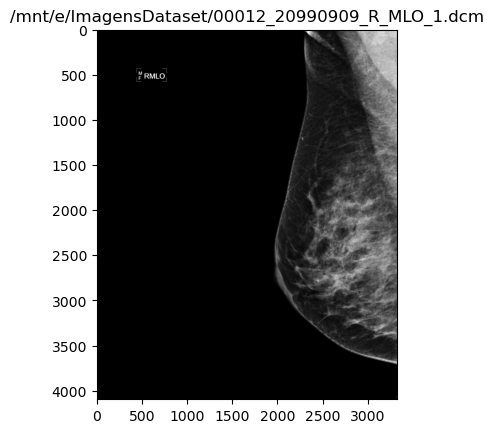

In [3]:
plt.title(img.filename)
plt.imshow(imgArray,cmap="gray");
np.shape(imgArray)

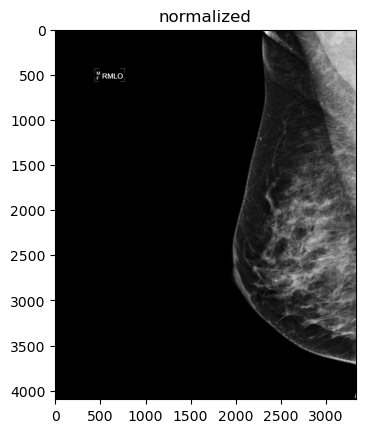

In [11]:
normalizeImage = cv.normalize(imgArray, np.zeros(np.shape(imgArray)), 0, 255, cv.NORM_MINMAX)
plt.title('normalized')
plt.imshow(normalizeImage,cmap="gray")

In [ ]:
cv.imshow('normalize',normalizeImage)

In [ ]:
histogram = cv.calcHist([imgArray],[0],None,[256],[0,256])

In [ ]:
notEqualized = cv.cvtColor(imgArray, cv.COLOR_BGR2GRAY)
equalized = cv.equalizeHist(notEqualized)

In [ ]:
cv.imshow('teste',imgArray)